## Example of TensorFlow Code

The first example is a sequential model, which is a linear pipelines of neural network layers.

In [1]:
import tensorflow as tf
from tensorflow import keras

NB_CLASSES = 10
RESHAPED = 784

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
                             input_shape=(RESHAPED,), 
                             kernel_initializer='zeros', # how do we want to initialize the perceptros.
                                                         # zeros, initalize as zero
                                                         # random_uniform, uniform randomized small values in the range(-0.5, 0.5)
                                                         # random_normal, initialized according to gaussian distribution, with 
                                                         #     0 as the mean, and 0.05 as the standard deviation
                             name='dense_layer',         # all neurons in a layer are connection to all neurons in the previous layer
                             activation='softmax'))

2024-06-25 04:07:29.243094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 04:07:29.243119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 04:07:29.243826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-25 04:07:29.248509: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 04:07:30.819759: E external/local_xla/xla/

### Defining a simple neural net in TensorFlow

<ul>
    <li>epoch - how long the training should last</li>
    <li>batch_size - is the number of sample you feed a network at a time</li>
    <li>validation sample - amount of data reservered for checking if our network is valid</li>
</ul>

#### One hot encoding - 
encode the data into categorical format, using an array of possible categories

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# Network and training parameters
#EPOCHS = 200
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = in this chase the number of digits
VALIDATION_SPLIT = 0.2 # how much training data is reserved for validation

# Load the MNIST dataset
# Labels have one-hot representation, automatically applied
mnist = keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values, resahe it to 600000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs to be within [0,1]
X_train /= 255
X_test /= 255
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

60000 train samples
10000 test samples


<ul>
    <li>Input layer - is 28 by 28 neujrons</li>
    <li>typically values associated with each pixel are normalized in range [0, 1]</li>
    <li>Final layer - a single neuron with the activation function 'softmax', (generalized sigmoid function).  The output is a range (0, 1) over range (-infinity, infinity)</li>
    <li>softmax "squashes" a K-dimensional vector of arbitrary real values into a K-dimensional vector provided by the previous lay with ten neurnons.</li>
</ul>

In [3]:
# Build the model 
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
                             input_shape=(RESHAPED,),
                             name='dense_layer',
                             activation='softmax'))

<ul>
    <li><b>Optimizer function - algorithm to update the weights while training the model<b></li>
    <li>MSE (Mean Squared Error - </li>
    <li>binary-crossentropy - </li>
    <li>categorical-crossentropy - </li>
    <li><b>Common Metrics<b></li>
    <li>Accuracy -</li>
    <li>Precision -</li>
    <li>Recall -</li>
</ul>

In [4]:
# Compiling the Model
model.compile(optimizer='SGD',                  # Stochastic Gradient Descent (SGD) optimization algorithm used to reduce mistakes by neural networks after training epoch
              loss='categorical_crossentropy',  # categorical-crossentropy - multiclass logarithmic loss
              metrics=['accuracy'])             # proportion of correct predictions with respect to total

<ul>
    <li>epoch - number of times model is exposed to training set.</li>
    <li>batch size - number of training instances observed before optimizer performs a weight update</li>
</ul>

In [17]:
# Training the model.  Collect the history so we can graph it later
history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0617 - accuracy: 0.9806 - val_loss: 0.0765 - val_accuracy: 0.9787
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0623 - accuracy: 0.9805 - val_loss: 0.0762 - val_accuracy: 0.9787
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0605 - accuracy: 0.9811 - val_loss: 0.0764 - val_accuracy: 0.9783
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9805 - val_loss: 0.0767 - val_accuracy: 0.9788
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0584 - accuracy: 0.9813 - val_loss: 0.0768 - val_accuracy: 0.9783
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0597 - accuracy: 0.9810 - val_loss: 0.0763 - val_accuracy: 0.9783
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0601 - accuracy: 0.9810 - val_loss: 0.0770 - val_accuracy: 0.9790
Epoch 

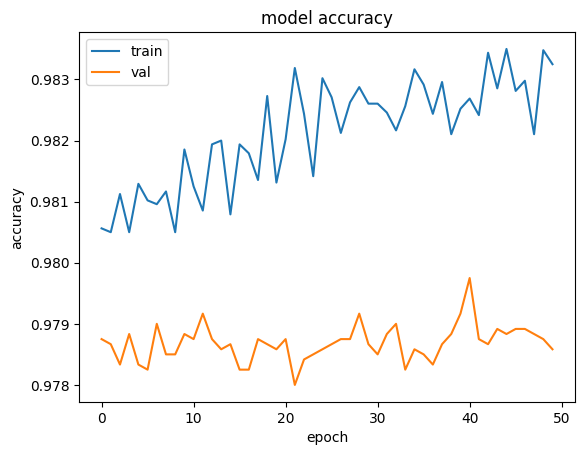

In [18]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
# evaluate the mdel
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 0s 953us/step - loss: 0.0713 - accuracy: 0.9793
Test accuracy:  0.9793000221252441


<hr/><br/>

## Improving the simple net in TensorFlow with hidden layers

An initial improvement is to add additional layers to our network because thses additional neurons might intuitively help to learn more complex patterns in the data.

In [20]:
import tensorflow as tf
from tensorflow import keras

# network and training.
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10          # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2   # how much TRAIN is reserved for VALIDATION

# Loading MNIST dataset.
# Labels have one-hot representation.
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values; we reshape it to 600000 x 784.
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs to be within [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], ' = train samples')
print(X_test.shape[0], ' = test samples')

# Labels have one-hot representation
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

# Build the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(RESHAPED,),
                             name='dense_layer', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES,
                             name='dense_layer_3', activation='softmax'))

# Summary of the model.
model.summary()

# Compiling the mode.
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluting the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy: ', test_acc)

60000  = train samples
10000  = test samples
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 1.4530 - accuracy: 0.6388 - val_loss: 0.7487 - val_accuracy: 0.8457
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.5963 - accuracy

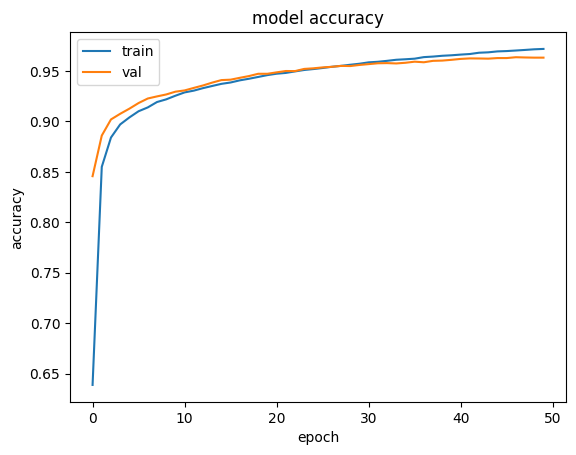

In [21]:
## Graph my accuracy / validation in a line graph
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<hr/><br/>

### Further improving the the simple tensorflow

- Add a dropout to the the model, this is a simple means of heling regularizing our neural network

In [22]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# Networking and training
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10          # number of outputs = 10 digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2   # how much of the dataset to reserve for validation
DROPOUT = 0.3            # rate of drop_outs for out dataser

# Loading our MNIST
# Labels have one-hot encoding
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs within [0, 1].
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], ': train samples')
print(X_test.shape[0], ': test samples')

# One-hot representations for labels.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

# Building the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(RESHAPED,),
                             name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
                             name='dense_layer_3', activation='softmax'))

# Summary of the model.
model.summary()

# Compiling the model.
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

60000 : train samples
10000 : test samples
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________

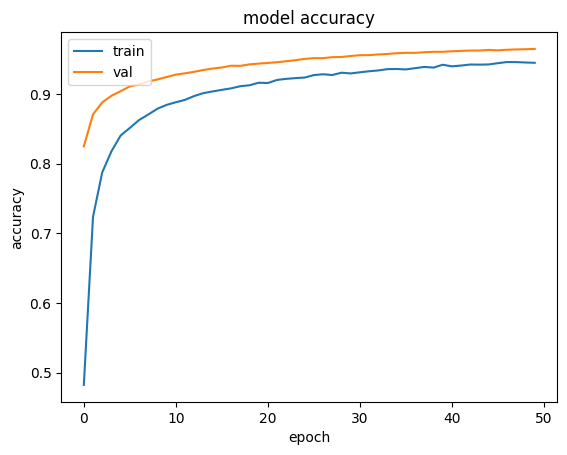

In [23]:
## Graph my accuracy / validation in a line graph
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<hr /><br />

## Testing different optimizers in Tensor flow

- <b>Gradient Descent (GD)</b> - imagine solving for a partial derivate at a point, training a model is like taking a series of parital deriavaties to try and arrive at our pervered solution.
- <b> Stocastic Gradient Descent (SGD)</b> - version of gradient descent implemented by Tensorflow
- <b>RMSProp</b> - optimization technique, alternative to SGD
- <b>Adam</b> - optimization technique, alternative to SGD

In [24]:
## Try running the same model agin but using the RMSProp

# Compiling the model.
model.compile(optimizer='RMSProp',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1921 - accuracy: 0.9427 - val_loss: 0.1097 - val_accuracy: 0.9678
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1583 - accuracy: 0.9536 - val_loss: 0.1037 - val_accuracy: 0.9678
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1340 - accuracy: 0.9595 - val_loss: 0.0950 - val_accuracy: 0.9735
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1246 - accuracy: 0.9629 - val_loss: 0.0928 - val_accuracy: 0.9741
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9661 - val_loss: 0.0892 - val_accuracy: 0.9751
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9688 - val_loss: 0.0919 - val_accuracy: 0.9753
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1006 - accuracy: 0.9699 - val_loss: 0.0896 - val_accuracy: 0.9755
Epoch 

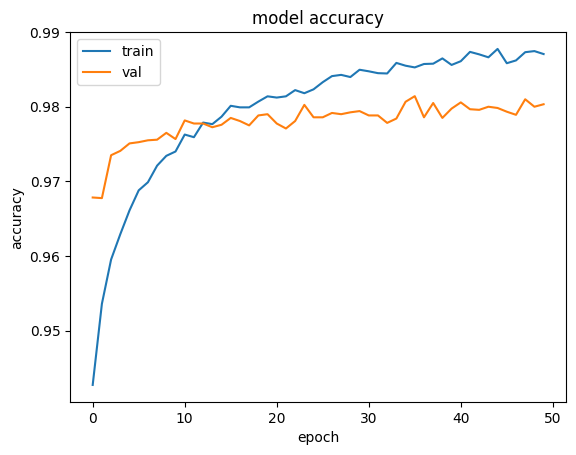

In [25]:
## Graph my accuracy / validation in a line graph
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Try again with the Adam optimizer

In [26]:
## Try running the same model agin but using the Adam

# Compiling the model.
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9855 - val_loss: 0.1103 - val_accuracy: 0.9793
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0508 - accuracy: 0.9848 - val_loss: 0.1102 - val_accuracy: 0.9792
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0493 - accuracy: 0.9846 - val_loss: 0.1002 - val_accuracy: 0.9792
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.1023 - val_accuracy: 0.9798
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.1013 - val_accuracy: 0.9785
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0438 - accuracy: 0.9867 - val_loss: 0.1030 - val_accuracy: 0.9775
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0424 - accuracy: 0.9863 - val_loss: 0.0969 - val_accuracy: 0.9802
Epoch 

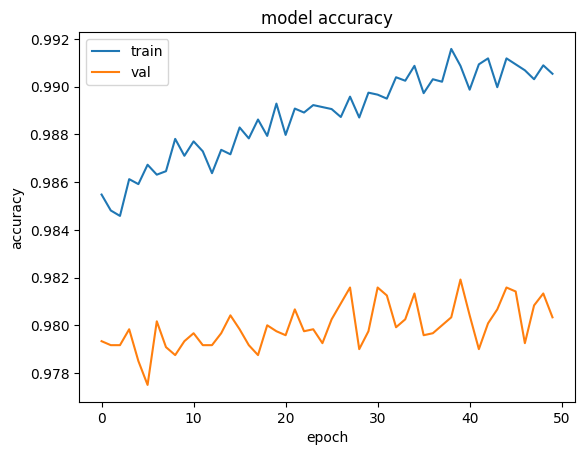

In [27]:
## Graph my accuracy / validation in a line graph
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<hr /><br />

### Increasing the number of epochs

- Let's make another attempt and increase the number of epochs used for training from 20 to 200

In [28]:
## They were already running them in EPOCS of 200, so we're gonna up the size to 250 to test it out

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard


log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Networking and training
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10          # number of outputs = 10 digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2   # how much of the dataset to reserve for validation
DROPOUT = 0.3            # rate of drop_outs for out dataser

# Loading our MNIST
# Labels have one-hot encoding
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs within [0, 1].
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], ': train samples')
print(X_test.shape[0], ': test samples')

# One-hot representations for labels.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

# Building the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(RESHAPED,),
                             name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
                             name='dense_layer_3', activation='softmax'))

# Summary of the model.
model.summary()

# Compiling the model.
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
          callbacks=[tensorboard_callback])


# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

60000 : train samples
10000 : test samples
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________

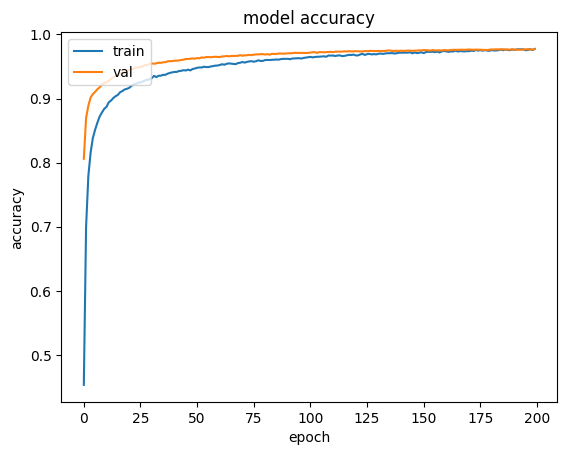

In [29]:
## Graph my accuracy / validation in a line graph
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<hr /><br />

### Increasing the number of hidden internal hidden neurons

- This will significantly increase the time to train

In [30]:
## They were already running them in EPOCS of 200, so we're gonna up the size to 250 to test it out

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard


log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Networking and training
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10          # number of outputs = 10 digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2   # how much of the dataset to reserve for validation
DROPOUT = 0.3            # rate of drop_outs for out dataser

# Loading our MNIST
# Labels have one-hot encoding
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs within [0, 1].
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], ': train samples')
print(X_test.shape[0], ': test samples')

# One-hot representations for labels.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

# Building the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(RESHAPED,),
                             name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer_3', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
                             name='dense_layer_4', activation='softmax'))

# Summary of the model.
model.summary()

# Compiling the model.
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
          callbacks=[tensorboard_callback])


# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

60000 : train samples
10000 : test samples
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 128)               16512     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_laye

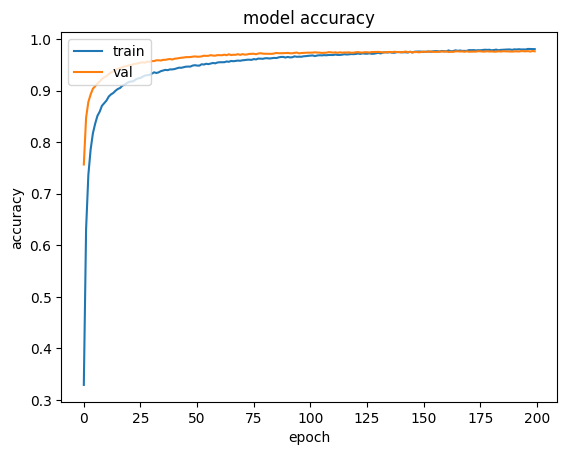

In [31]:
## Graph my accuracy / validation in a line graph
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<hr /><br />

### Increasing the size of batch computation

- GD tries to minimize the cost function

In [32]:
## They were already running them in EPOCS of 200, so we're gonna up the size to 250 to test it out

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard


log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Networking and training
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10          # number of outputs = 10 digits
N_HIDDEN = 256
VALIDATION_SPLIT = 0.2   # how much of the dataset to reserve for validation
DROPOUT = 0.3            # rate of drop_outs for out dataser

# Loading our MNIST
# Labels have one-hot encoding
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs within [0, 1].
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], ': train samples')
print(X_test.shape[0], ': test samples')

# One-hot representations for labels.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

# Building the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(RESHAPED,),
                             name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer_3', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
                             name='dense_layer_4', activation='softmax'))

# Summary of the model.
model.summary()

# Compiling the model.
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
          callbacks=[tensorboard_callback])


# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

60000 : train samples
10000 : test samples
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 256)               200960    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 256)               65792     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 256)               65792     
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_laye

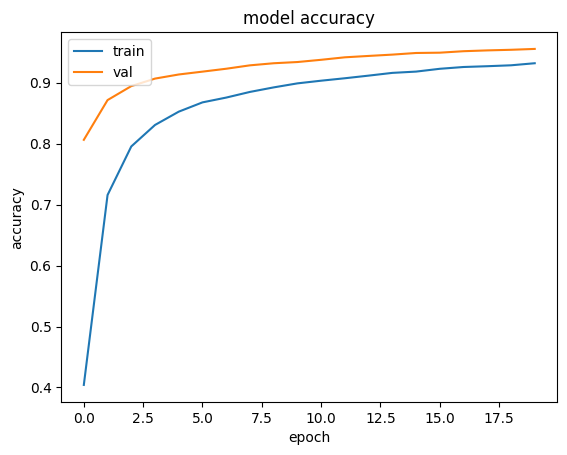

In [33]:
## Graph my accuracy / validation in a line graph
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<hr /><br />

## Regularization

### Adopting regularization to avoid overfitting

<ul>
    <li>There are three different types of regularization using in machine learning:</li>
    <li><b>L1 regularization (LASSO)</b>: complexity is expressed as the sum of absolute alues of the weights</li>
    <li><b>L2 regularization (Ridge)</b>: complexity of model is the sum of the squares of the weights</li>
    <li><b>ElasticNet regularization</b>: combination of Lasso and Ridge</li>
</ul>

In [45]:
## activity_l2 is a library from Keras version < 2

import tensorflow as tf
#from keras.regularizers import l2, activity_l2
from keras.regularizers import l2
from keras import regularizers

#model.add(Dense(64, input_dim=64, W_regularizer=l2(0.01),
#                activity_regularizer=activity_l2(0.01)))
model.add(keras.layers.Dense(64, input_dim=64, 
                             bias_regularizer=l2(0.01),
                             activity_regularizer=regularizers.L2(0.01)
                            ))

### Understanding batch normalization

- Enables accelerated training, during training the weights of early layers change and the layer layers input change.  Each layer must continuously re-adjust it's weights to the different  distributions.  batch  normailations transorm the layer outputs into gaussian distribution unit.  Thus the layers will have significantly less variation.

### Playing with Google Colab: GPUs, GPUs, and TPUs

- <b>SKIPPED</b>

<hr/><br/>

## Sentiment analysis

What is the sentiment of the sentence passed to me

In [50]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
import tensorflow_datasets as tfds

max_len = 200
n_words = 10000
dim_embedding = 256
EPOCHS = 20
BATCH_SIZE = 500

def load_data():
    #Load data.
    (X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=n_words)

    # Pad sequences with max_len.
    X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
    X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

    return (X_train, y_train), (X_test, y_test)

def build_model():
    model = models.Sequential()
    
    # Input: - eEmbedding Layer
    # The model will take as input an integer matrix of size (batch, input_length).
    # The model will output dimension (input_length, dim_embedding).
    # The largest integer in the input should be no larger
    # than n_words (vocabulary size).
    model.add(layers.Embedding(n_words,
        dim_embedding, input_length=max_len))
    model.add(layers.Dropout(0.3))
    
    # Takes the maximum value of either feature vector from each of the n_words features.
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

## now we train our model
(X_train, y_train), (X_test, y_test) = load_data()

model = build_model()
model.summary()

codel.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])

score = model.fit(X_train, y_train,
                  epochs=EPOCS,
                  batch_size=BATCH_SIZE,
                  validation_data=(X_test, y_test)
                 )

score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print("\nTest score:", score[0])
print("\nTest accuracy:", score[1])


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 256)          2560000   
                                                                 
 dropout_14 (Dropout)        (None, 200, 256)          0         
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                     

NameError: name 'codel' is not defined